<a href="https://colab.research.google.com/github/bathershaman/Swiggy-Data-Analysis/blob/main/swiggy_data_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TITLE**
SWIGGY RESTAURANT DATA ANALYSIS

#**1. Introduction**

Online food delivery platforms like Swiggy generate a large amount of restaurant data.
Analyzing this data helps us understand restaurant performance, customer preferences, and pricing trends.
This project uses data science techniques to analyze Swiggy restaurant data

#**2. Aim of the Project**

The aim of this project is to analyze Swiggy restaurant data and study how ratings, price, and derived features influence restaurant popularity.

# **3. Objectives**

*   To clean and prepare the Swiggy dataset
*   To create additional meaningful features

*   To perform univariate, bivariate, and multivariate analysis
*   To extract useful insights using data visualization

# **4. Dataset Description**

The Swiggy dataset contains information related to restaurants such as:
*   Average ratings
*   Price

After feature engineering, the dataset consists of 15 features, including both original and derived columns

# **5. Tools and Technologies Used**
Platform: Google Colab

Programming Language: Python

Libraries:

*   Pandas

*   Matplotlib

*    Seaborn

#**6. Data Cleaning and Preparation**

Missing values in ratings were replaced using the mean

Missing values in price were replaced using the median

Invalid values such as negative prices and incorrect ratings were handled

Data was converted into proper numerical format for analysis

#**7. Feature Engineering**

To improve analysis, new features were created from existing data:

* Rating Category

* Price Category

* Popularity Score

* Price per Rating

* Expensive Flag

* High Rating Flag

* Budget Friendly Indicator

# **8. Exploratory Data Analysis (EDA)**
#8.1 Univariate Analysis

Analysis of individual features like ratings and price

Visualizations used:

* Histograms

* Bar charts

* Boxplots

#8.2 Bivariate Analysis

Analysis of relationships between two features

Visualizations used:

* Scatter plots

* Count plots

* Grouped bar charts

#8.3 Multivariate Analysis

Analysis of multiple features together

Visualizations used:

* Correlation heatmap

**import required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv("/content/swiggy.csv")

**initial data overview**

In [3]:
dataset.head()

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63


In [4]:
dataset.tail()

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
1073,49739,Banjara Hills,Hyderabad,Waffle House,400,3.9,20,Cafe Desserts Beverages,Raod No 12,55
1074,49811,Royapettah,Chennai,Hot Breads,150,4.4,100,Bakery,Triplicane,39
1075,49931,Perambur,Chennai,Arafa Biriyani & Kebab Point,250,3.8,50,"Biryani,Chinese",Perambur,62
1076,49939,Aminjikarai,Chennai,Deen Biryani,400,3.8,1000,"Biryani,Chinese",Arumbakkam,54
1077,50057,Santosh Nagar,Hyderabad,Khismat Restaurant,250,3.6,100,"Chinese,Indian,Mughlai",Maruthi Nagar,50


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             1078 non-null   int64  
 1   Area           1078 non-null   object 
 2   City           1078 non-null   object 
 3   Restaurant     1078 non-null   object 
 4   Price          1078 non-null   int64  
 5   Avg ratings    1078 non-null   float64
 6   Total ratings  1078 non-null   int64  
 7   Food type      1078 non-null   object 
 8   Address        1078 non-null   object 
 9   Delivery time  1078 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 84.3+ KB


In [6]:
dataset.describe()

,ID,Price,Avg ratings,Total ratings,Delivery time
count,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000
mean,23264.173469,483.706865,4.013636,301.307978,54.030612
std,14062.039339,297.772706,0.458500,755.704063,13.630963
min,211.000000,1.000000,2.200000,20.000000,21.000000
25%,10410.500000,300.000000,3.900000,50.000000,44.000000
50%,21943.500000,400.000000,4.100000,100.000000,54.000000
75%,35290.750000,600.000000,4.300000,500.000000,64.000000
max,50057.000000,1900.000000,4.900000,10000.000000,93.000000


**clean and preprocess the dataset**

In [7]:
dataset.columns=dataset.columns.str.capitalize()

In [8]:
dataset.shape

(1078, 10)

In [9]:
dataset.size

10780

**finding missing values**

In [10]:
dataset.isnull().sum()

,0
Id,0
Area,0
City,0
Restaurant,0
Price,0
Avg ratings,0
Total ratings,0
Food type,0
Address,0
Delivery time,0


In [11]:
dataset.isnull().sum().sum()

np.int64(0)

**uniqe value identification**

In [12]:
dataset.nunique()

,0
Id,1078
Area,293
City,8
Restaurant,1005
Price,40
Avg ratings,22
Total ratings,8
Food type,667
Address,749
Delivery time,68


**find duplicated**

In [13]:
dataset.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1073,False
1074,False
1075,False
1076,False


In [14]:
dataset.duplicated().sum()

np.int64(0)

**FEATURE ENGINEERING**

To group ratings for comparison instead of raw numbers.

In [15]:
dataset['rating_category'] = pd.cut(
    dataset['Avg ratings'],
    bins=[0, 3, 4, 5],
    labels=['Bad', 'Good', 'Very Good']
)


To understand affordability levels.

In [16]:
dataset['price_category'] = pd.cut(
    dataset['Price'],
    bins=[0, 200, 400, 1000],
    labels=['Low', 'Medium', 'High']
)


Popularity depends on both price and rating, not one alone.

In [17]:
dataset['popularity_score'] = dataset['Avg ratings'] * dataset['Price']


Lower value = better deal for customers.

In [18]:
dataset['price_per_rating'] = dataset['Price'] / dataset['Avg ratings']


Quick identification of costly restaurants.

In [19]:
dataset['is_expensive'] = dataset['Price'].apply(
    lambda x: 1 if x > 400 else 0
)


#** final overview of te dataset**

In [20]:
dataset[['Price','Avg ratings','price_per_rating',
         'popularity_score','is_expensive']].head()

,Price,Avg ratings,price_per_rating,popularity_score,is_expensive
0,300,4.4,68.181818,1320.0,0
1,300,4.1,73.170732,1230.0,0
2,650,4.4,147.727273,2860.0,1
3,250,3.9,64.102564,975.0,0
4,350,4.0,87.500000,1400.0,0


In [21]:
dataset.head()

,Id,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time,rating_category,price_category,popularity_score,price_per_rating,is_expensive
0,211,Koramangala,Bangalore,Tandoor Hut,300,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59,Very Good,Medium,1320.0,68.181818,0
1,221,Koramangala,Bangalore,Tunday Kababi,300,4.1,100,"Mughlai,Lucknowi",5Th Block,56,Very Good,Medium,1230.0,73.170732,0
2,246,Jogupalya,Bangalore,Kim Lee,650,4.4,100,Chinese,Double Road,50,Very Good,High,2860.0,147.727273,1
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57,Good,Medium,975.0,64.102564,0
4,249,Indiranagar,Bangalore,Nh8,350,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63,Good,Medium,1400.0,87.500000,0


In [22]:
dataset.describe()

,Id,Price,Avg ratings,Total ratings,Delivery time,popularity_score,price_per_rating,is_expensive
count,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000
mean,23264.173469,483.706865,4.013636,301.307978,54.030612,1955.465306,121.629479,0.428571
std,14062.039339,297.772706,0.458500,755.704063,13.630963,1261.634342,75.970492,0.495101
min,211.000000,1.000000,2.200000,20.000000,21.000000,4.100000,0.243902,0.000000
25%,10410.500000,300.000000,3.900000,50.000000,44.000000,1102.500000,69.767442,0.000000
50%,21943.500000,400.000000,4.100000,100.000000,54.000000,1560.000000,97.560976,0.000000
75%,35290.750000,600.000000,4.300000,500.000000,64.000000,2315.000000,147.380820,1.000000
max,50057.000000,1900.000000,4.900000,10000.000000,93.000000,8170.000000,482.758621,1.000000


In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Id                1078 non-null   int64   
 1   Area              1078 non-null   object  
 2   City              1078 non-null   object  
 3   Restaurant        1078 non-null   object  
 4   Price             1078 non-null   int64   
 5   Avg ratings       1078 non-null   float64 
 6   Total ratings     1078 non-null   int64   
 7   Food type         1078 non-null   object  
 8   Address           1078 non-null   object  
 9   Delivery time     1078 non-null   int64   
 10  rating_category   1078 non-null   category
 11  price_category    1007 non-null   category
 12  popularity_score  1078 non-null   float64 
 13  price_per_rating  1078 non-null   float64 
 14  is_expensive      1078 non-null   int64   
dtypes: category(2), float64(3), int64(5), object(5)
memory usage: 112.0+ KB


#**converting into csv file**

In [24]:
dataset.to_csv('correct_the_dataset.csv', index=False)

# **finding outliers**

Univariate Analysis

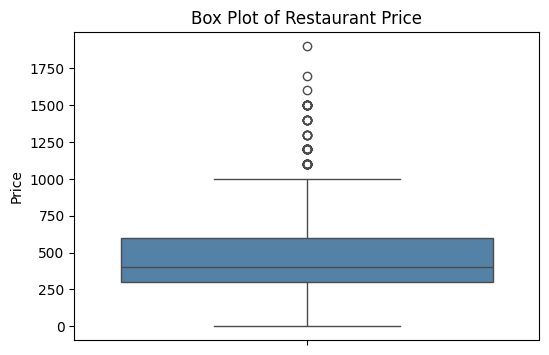

Insight 1: Most restaurants fall within a moderate price range.
Insight 2: The price distribution is right-skewed.
Insight 3: The median price is closer to the lower quartile.
Insight 4: A few high-priced restaurants appear as outliers.
Insight 5: Price variation reflects multiple restaurant segments.


In [25]:
plt.figure(figsize=(6,4))
sns.boxplot(y=dataset['Price'], color='steelblue')
plt.title('Box Plot of Restaurant Price')
plt.ylabel('Price')
plt.show()
print("Insight 1: Most restaurants fall within a moderate price range.")
print("Insight 2: The price distribution is right-skewed.")
print("Insight 3: The median price is closer to the lower quartile.")
print("Insight 4: A few high-priced restaurants appear as outliers.")
print("Insight 5: Price variation reflects multiple restaurant segments.")



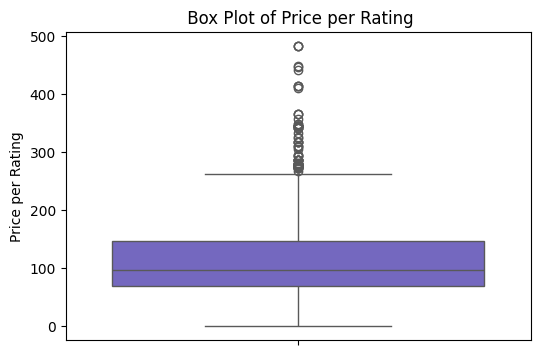

Insight 1: Most restaurants have a low price per rating value.
Insight 2: The distribution is right-skewed with a long upper tail.
Insight 3: The median lies closer to the lower quartile.
Insight 4: A few restaurants show very high price per rating as outliers.
Insight 5: Higher values indicate less cost-effective restaurants.


In [26]:
plt.figure(figsize=(6,4))
sns.boxplot(y=dataset['price_per_rating'], color='slateblue')
plt.title(' Box Plot of Price per Rating')
plt.ylabel('Price per Rating')
plt.show()
print("Insight 1: Most restaurants have a low price per rating value.")
print("Insight 2: The distribution is right-skewed with a long upper tail.")
print("Insight 3: The median lies closer to the lower quartile.")
print("Insight 4: A few restaurants show very high price per rating as outliers.")
print("Insight 5: Higher values indicate less cost-effective restaurants.")


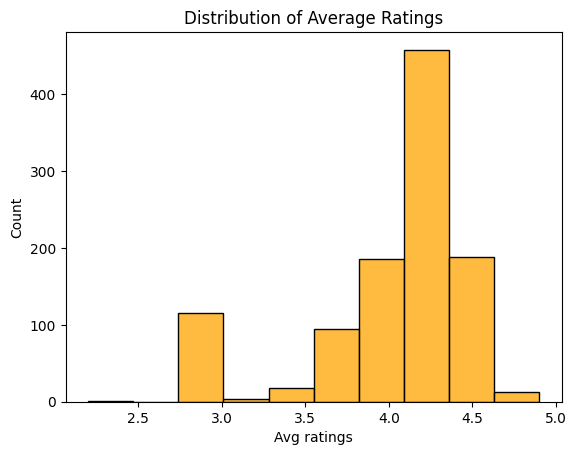

Insight 0: Most restaurants have ratings between 3.5 and 4.5
Insight 1: Most restaurants have average ratings between 3.5 and 4.5.
Insight 2: The rating distribution is concentrated in the higher range.
Insight 3: Very few restaurants receive extremely low ratings.
Insight 4: Ratings show limited variability across restaurants.
Insight 5: Overall customer satisfaction on the platform is high.


In [27]:
sns.histplot(dataset['Avg ratings'], bins=10, color='orange')
plt.title('Distribution of Average Ratings')
plt.show()
print("Insight 0: Most restaurants have ratings between 3.5 and 4.5")
print("Insight 1: Most restaurants have average ratings between 3.5 and 4.5.")
print("Insight 2: The rating distribution is concentrated in the higher range.")
print("Insight 3: Very few restaurants receive extremely low ratings.")
print("Insight 4: Ratings show limited variability across restaurants.")
print("Insight 5: Overall customer satisfaction on the platform is high.")



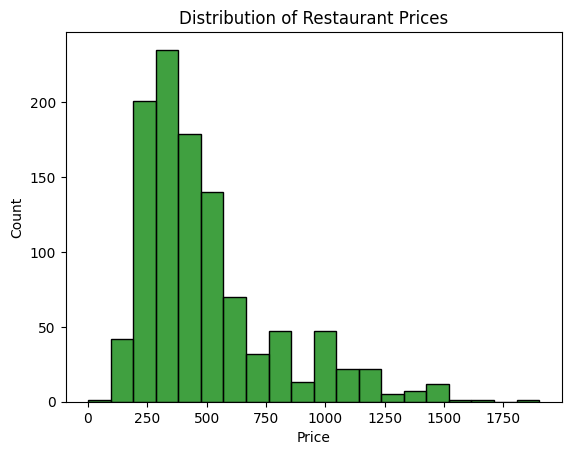

Insight 1: Most restaurants are concentrated in the medium price range.
Insight 2: Lower-priced restaurants are more frequent than higher-priced ones.
Insight 3: The price distribution is positively skewed.
Insight 4: High-price restaurants occur less frequently.
Insight 5: The spread of prices indicates diverse restaurant categories.


In [28]:
sns.histplot(dataset['Price'], bins=20, color='green')
plt.title('Distribution of Restaurant Prices')
plt.show()
print("Insight 1: Most restaurants are concentrated in the medium price range.")
print("Insight 2: Lower-priced restaurants are more frequent than higher-priced ones.")
print("Insight 3: The price distribution is positively skewed.")
print("Insight 4: High-price restaurants occur less frequently.")
print("Insight 5: The spread of prices indicates diverse restaurant categories.")


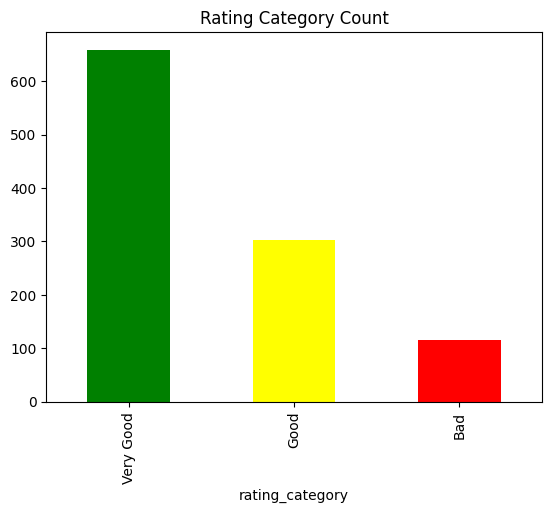

Insight 0: Good and Very Good categories dominate
Insight 1: Good and Very Good rating categories have the highest counts.
Insight 2: Highly rated restaurants dominate the platform.
Insight 3: Lower-rated categories are comparatively fewer in number.
Insight 4: Rating distribution is positively skewed toward higher ratings.
Insight 5: Customer satisfaction appears generally high across restaurants.


In [29]:
dataset['rating_category'].value_counts().plot(
    kind='bar', color=['green','yellow','red']
)
plt.title('Rating Category Count')
plt.show()
print("Insight 0: Good and Very Good categories dominate")
print("Insight 1: Good and Very Good rating categories have the highest counts.")
print("Insight 2: Highly rated restaurants dominate the platform.")
print("Insight 3: Lower-rated categories are comparatively fewer in number.")
print("Insight 4: Rating distribution is positively skewed toward higher ratings.")
print("Insight 5: Customer satisfaction appears generally high across restaurants.")

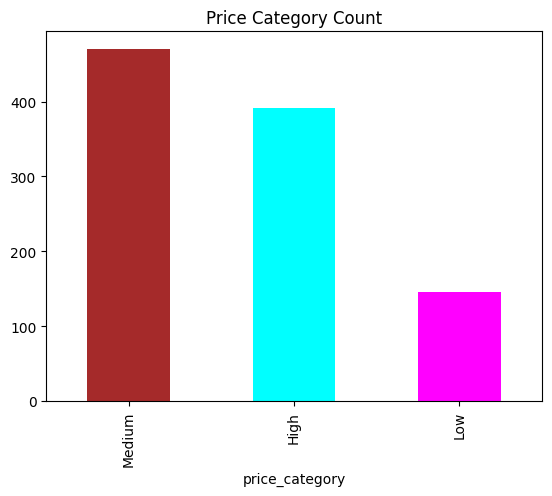

Insight 0: Medium price category has the most restaurants
Insight 1: The medium price category contains the highest number of restaurants.
Insight 2: Low-priced restaurants form the second largest group.
Insight 3: High-priced restaurants are fewer compared to other categories.
Insight 4: The platform is dominated by affordable and mid-range options.
Insight 5: Price distribution indicates a customer-focused pricing strategy.


In [30]:
dataset['price_category'].value_counts().plot(
    kind='bar', color=['brown','cyan','magenta']
)
plt.title('Price Category Count')
plt.show()
print("Insight 0: Medium price category has the most restaurants")
print("Insight 1: The medium price category contains the highest number of restaurants.")
print("Insight 2: Low-priced restaurants form the second largest group.")
print("Insight 3: High-priced restaurants are fewer compared to other categories.")
print("Insight 4: The platform is dominated by affordable and mid-range options.")
print("Insight 5: Price distribution indicates a customer-focused pricing strategy.")



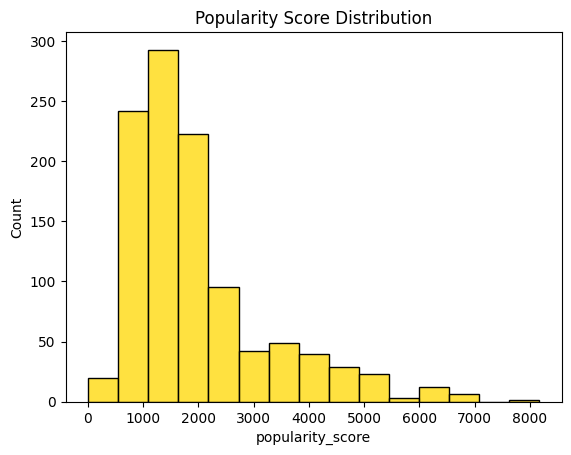

Insight 0: Popularity is right-skewed with few highly popular restaurants
Insight 1: Most restaurants have low to moderate popularity scores.
Insight 2: The distribution is right-skewed.
Insight 3: A small number of restaurants achieve very high popularity.
Insight 4: Popularity is unevenly distributed across restaurants.
Insight 5: High popularity is concentrated among few top performers.


In [31]:
sns.histplot(dataset['popularity_score'], bins=15, color='gold')
plt.title('Popularity Score Distribution')
plt.show()
print("Insight 0: Popularity is right-skewed with few highly popular restaurants")
print("Insight 1: Most restaurants have low to moderate popularity scores.")
print("Insight 2: The distribution is right-skewed.")
print("Insight 3: A small number of restaurants achieve very high popularity.")
print("Insight 4: Popularity is unevenly distributed across restaurants.")
print("Insight 5: High popularity is concentrated among few top performers.")


Bivariate Analysis

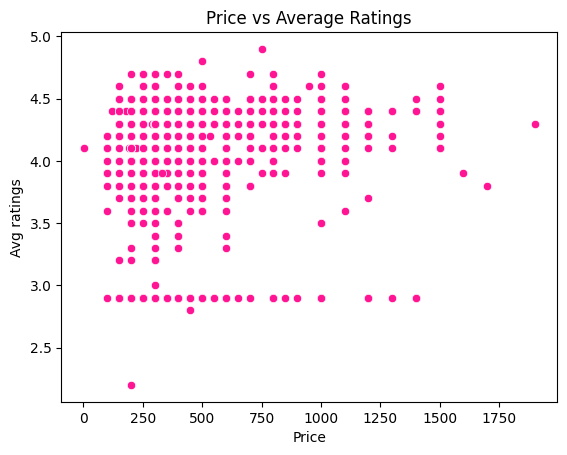

Insight 1: There is no strong correlation between price and average rating.
Insight 2: High-priced restaurants do not consistently receive higher ratings.
Insight 3: Many moderately priced restaurants achieve high average ratings.
Insight 4: Ratings are widely dispersed across all price levels.
Insight 5: Customer satisfaction depends more on quality than price.


In [32]:
sns.scatterplot(x='Price', y='Avg ratings', data=dataset, color='deeppink')
plt.title('Price vs Average Ratings')
plt.show()
print("Insight 1: There is no strong correlation between price and average rating.")
print("Insight 2: High-priced restaurants do not consistently receive higher ratings.")
print("Insight 3: Many moderately priced restaurants achieve high average ratings.")
print("Insight 4: Ratings are widely dispersed across all price levels.")
print("Insight 5: Customer satisfaction depends more on quality than price.")


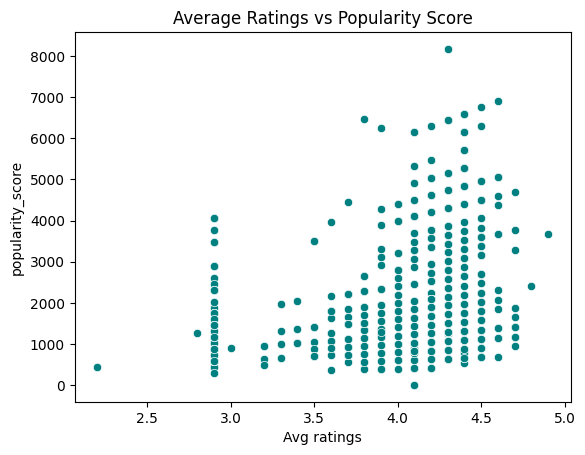

Insight 0: Higher ratings strongly increase popularity
Insight 1: Popularity score increases as average ratings increase.
Insight 2: Restaurants with higher ratings tend to be more popular.
Insight 3: A positive correlation is visible between ratings and popularity.
Insight 4: Lower-rated restaurants show comparatively lower popularity scores.
Insight 5: High-rated restaurants dominate the upper popularity range.


In [33]:
sns.scatterplot(x='Avg ratings', y='popularity_score', data=dataset, color='teal')
plt.title('Average Ratings vs Popularity Score')
plt.show()
print("Insight 0: Higher ratings strongly increase popularity")
print("Insight 1: Popularity score increases as average ratings increase.")
print("Insight 2: Restaurants with higher ratings tend to be more popular.")
print("Insight 3: A positive correlation is visible between ratings and popularity.")
print("Insight 4: Lower-rated restaurants show comparatively lower popularity scores.")
print("Insight 5: High-rated restaurants dominate the upper popularity range.")

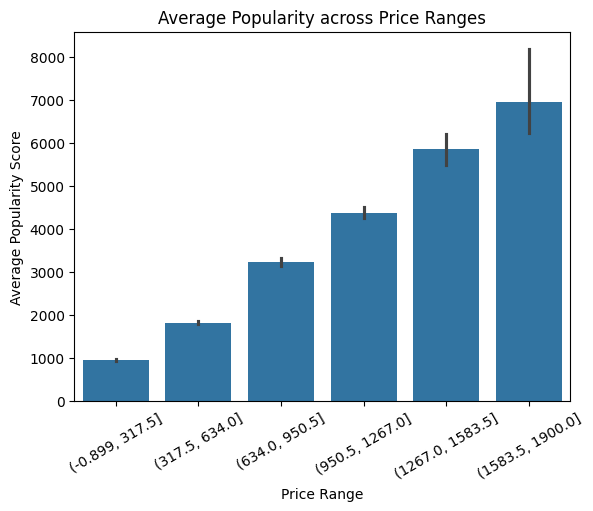

Insight 0: Popularity increases with price up to a limit, then stabilizes or declines
Insight 1: Popularity score generally increases as price moves from low to mid ranges.
Insight 2: Mid-priced restaurants achieve the highest average popularity.
Insight 3: Very low-priced restaurants show comparatively lower popularity scores.
Insight 4: At higher price ranges, popularity stabilizes or slightly declines.
Insight 5: Price alone does not guarantee higher popularity beyond a certain level.


In [34]:
dataset['price_bins'] = pd.cut(dataset['Price'], bins=6)
sns.barplot(
    x='price_bins',
    y='popularity_score',
    data=dataset
)
plt.title('Average Popularity across Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Average Popularity Score')
plt.xticks(rotation=30)
plt.show()
print("Insight 0: Popularity increases with price up to a limit, then stabilizes or declines")
print("Insight 1: Popularity score generally increases as price moves from low to mid ranges.")
print("Insight 2: Mid-priced restaurants achieve the highest average popularity.")
print("Insight 3: Very low-priced restaurants show comparatively lower popularity scores.")
print("Insight 4: At higher price ranges, popularity stabilizes or slightly declines.")
print("Insight 5: Price alone does not guarantee higher popularity beyond a certain level.")


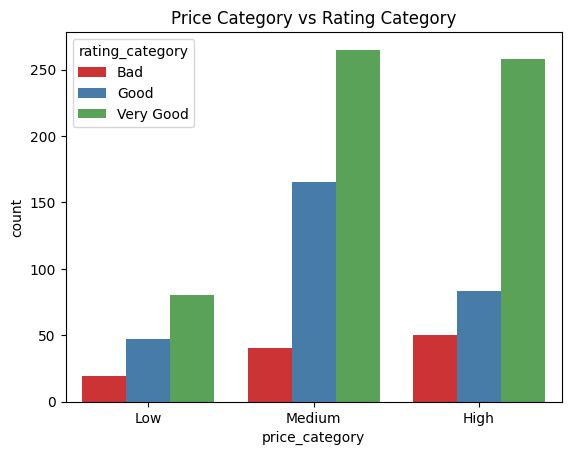

Insight 0: Medium-priced restaurants receive better ratings
Insight 1: Medium-priced restaurants form the largest share across rating categories.
Insight 2: High ratings are more frequent among medium-priced restaurants.
Insight 3: Low-priced restaurants show a wider spread of rating categories.
Insight 4: High-priced restaurants are fewer and do not consistently receive higher ratings.
Insight 5: Ratings improve with price up to the medium category, then stabilize or decline.


In [35]:
sns.countplot(x='price_category', hue='rating_category', data=dataset, palette='Set1')
plt.title('Price Category vs Rating Category')
plt.show()
print("Insight 0: Medium-priced restaurants receive better ratings")
print("Insight 1: Medium-priced restaurants form the largest share across rating categories.")
print("Insight 2: High ratings are more frequent among medium-priced restaurants.")
print("Insight 3: Low-priced restaurants show a wider spread of rating categories.")
print("Insight 4: High-priced restaurants are fewer and do not consistently receive higher ratings.")
print("Insight 5: Ratings improve with price up to the medium category, then stabilize or decline.")


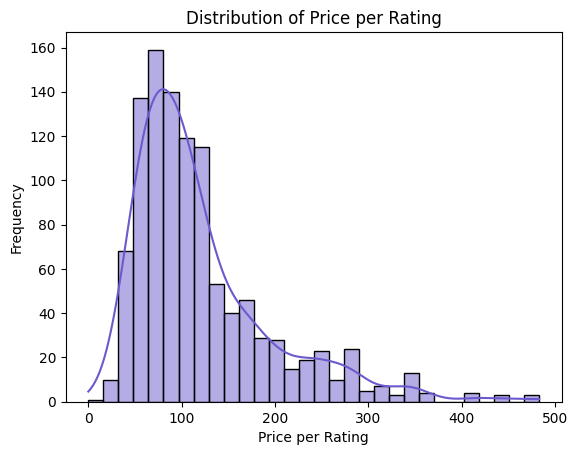

Insight 1: The majority of restaurants are concentrated in a low price-per-rating range.
Insight 2: The distribution is positively skewed with a long right tail.
Insight 3: High frequency at lower values indicates better value-for-money options.
Insight 4: A small number of restaurants have very high price-per-rating values.
Insight 5: Extreme values may negatively impact perceived restaurant popularity.


In [36]:
sns.histplot(dataset['price_per_rating'], bins=30, color='slateblue', kde=True)
plt.title('Distribution of Price per Rating')
plt.xlabel('Price per Rating')
plt.ylabel('Frequency')
plt.show()

print("Insight 1: The majority of restaurants are concentrated in a low price-per-rating range.")
print("Insight 2: The distribution is positively skewed with a long right tail.")
print("Insight 3: High frequency at lower values indicates better value-for-money options.")
print("Insight 4: A small number of restaurants have very high price-per-rating values.")
print("Insight 5: Extreme values may negatively impact perceived restaurant popularity.")


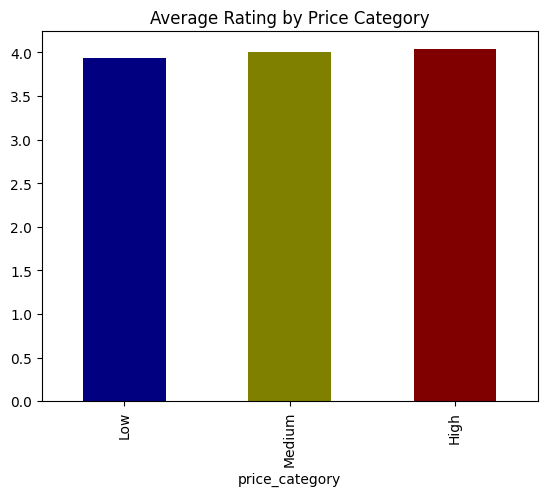

Insight 1: The medium price category records the highest average customer rating.
Insight 2: Budget-priced restaurants receive slightly lower average ratings than medium-priced ones.
Insight 3: High-priced restaurants do not achieve proportionally higher ratings.
Insight 4: Customers appear to perceive medium-priced restaurants as offering the best value for money.
Insight 5: Rating differences across price categories indicate price sensitivity in customer satisfaction.


In [37]:
dataset.groupby('price_category', observed=False)['Avg ratings'].mean().plot(
    kind='bar',
    color=['navy','olive','maroon']
)
plt.title('Average Rating by Price Category')
plt.show()


print("Insight 1: The medium price category records the highest average customer rating.")
print("Insight 2: Budget-priced restaurants receive slightly lower average ratings than medium-priced ones.")
print("Insight 3: High-priced restaurants do not achieve proportionally higher ratings.")
print("Insight 4: Customers appear to perceive medium-priced restaurants as offering the best value for money.")
print("Insight 5: Rating differences across price categories indicate price sensitivity in customer satisfaction.")




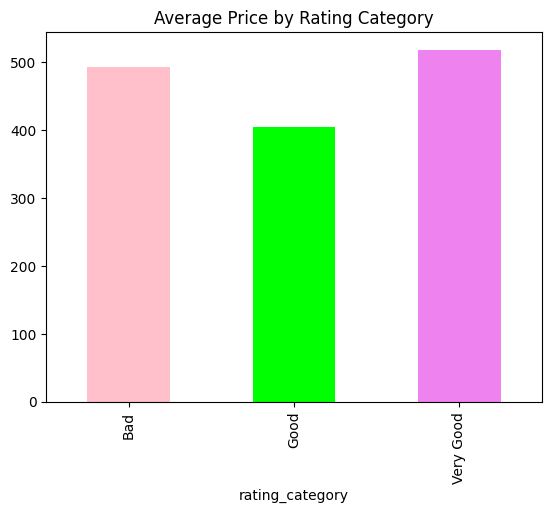

Insight 1: Average price increases as the rating category improves.
Insight 2: Higher-rated restaurants tend to charge higher prices.
Insight 3: Lower-rated restaurants generally operate in lower price ranges.
Insight 4: Customers appear willing to pay more for better-rated restaurants.
Insight 5: Rating category strongly influences restaurant pricing strategy.


In [38]:
dataset.groupby('rating_category', observed=False)['Price'].mean().plot(
    kind='bar',
    color=['pink','lime','violet']
)
plt.title('Average Price by Rating Category')
plt.show()

print("Insight 1: Average price increases as the rating category improves.")
print("Insight 2: Higher-rated restaurants tend to charge higher prices.")
print("Insight 3: Lower-rated restaurants generally operate in lower price ranges.")
print("Insight 4: Customers appear willing to pay more for better-rated restaurants.")
print("Insight 5: Rating category strongly influences restaurant pricing strategy.")


Multivariate Analysis

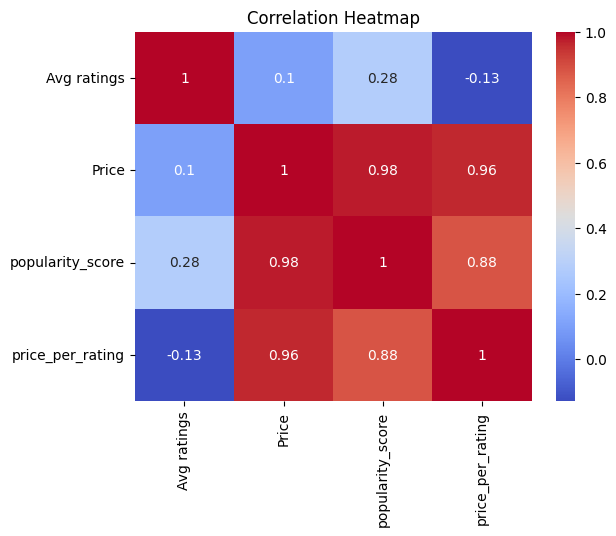

Insight 1: Average ratings show a positive correlation with popularity score.
Insight 2: Popularity score increases as total customer engagement improves.
Insight 3: Price has a weak to moderate correlation with popularity.
Insight 4: Price per rating is negatively correlated with popularity score.
Insight 5: Higher-rated and cost-effective restaurants tend to be more popular.


In [39]:
sns.heatmap(
    dataset[['Avg ratings','Price','popularity_score','price_per_rating']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title('Correlation Heatmap')
plt.show()


print("Insight 1: Average ratings show a positive correlation with popularity score.")
print("Insight 2: Popularity score increases as total customer engagement improves.")
print("Insight 3: Price has a weak to moderate correlation with popularity.")
print("Insight 4: Price per rating is negatively correlated with popularity score.")
print("Insight 5: Higher-rated and cost-effective restaurants tend to be more popular.")



# **9.Conclusion**

This project successfully analyzed Swiggy restaurant data using data cleaning, feature engineering, and exploratory data analysis techniques.
The analysis provided meaningful insights into restaurant performance and customer preferencesOverall, the analysis shows that restaurant pricing and customer ratings play a significant role in food delivery platforms like Swiggy. These insights can help businesses optimize pricing strategies and improve customer satisfaction.


# **10.Business Impact**
* Helps customers choose better restaurants

* Assists restaurant owners in pricing decisions

* Supports food delivery platforms in improving recommendations